<a href="https://colab.research.google.com/github/tmarissa/marissa_DATA606/blob/main/ipynb/603_K_Means_State.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 606 Capstone
## Marissa Tan
### Impact of COVID-19 on the US Housing Market
__Density and Real Estate (State Level)__<br><br>
This notebook:
- Merge the density and real estate dataset.
- Merge Average Lisitng Price 2019 and 2021 and Density
    - Real Estate Dataset Cleansed
    - Real Estate Dataset Uncleansed
- Plot Kmeans State Level 2019 and 2021

In [1]:
import pandas as pd
import matplotlib
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Density and Real Estate

# 1. Density

## 1.1 Read CSV Files
Load Density and Real Estate files

# 2. Real Estate (Cleansed Data)


## 2.1a For the Year 2019

In [2]:
df_2019_ALP = pd.read_csv('df_2019_ALP.csv', index_col=False)
df_2019_ALP

,state,average_listing_price,density
0,AK,244955.355556,1
1,AK,262505.351351,1
2,AK,329144.000000,1
3,AK,326147.166667,1
4,AK,317021.666667,1
...,...,...,...
1887,WY,369577.833333,5
1888,WY,244374.625000,5
1889,WY,441952.375000,5
1890,WY,285269.750000,5


## 2.1b For the Year 2021

In [3]:
df_2021_ALP = pd.read_csv('df_2021_ALP.csv', index_col=False)
df_2021_ALP

,state,average_listing_price,density
0,AK,303301.118644,1
1,AK,369025.032258,1
2,AK,403989.666667,1
3,AK,426217.416667,1
4,AK,424255.666667,1
...,...,...,...
1913,WY,330620.588235,5
1914,WY,272268.600000,5
1915,WY,320769.125000,5
1916,WY,372003.636364,5


# 3. Real Estate (Cleansed Data)

## 3.1 State

### 3.1a  For Year 2019

### Determine Optimal Cluster (Elbow Method)

In [4]:
df_state_2019 = df_2019_ALP.groupby(by = ['state', 'density'])['average_listing_price'].mean().reset_index()
state_2019 = df_state_2019[['density', 'average_listing_price']]
state_2019.head(3)

,density,average_listing_price
0,1,296151.708130
1,99,231299.367110
2,57,181383.965378


In [5]:
state_2019.shape

(51, 2)

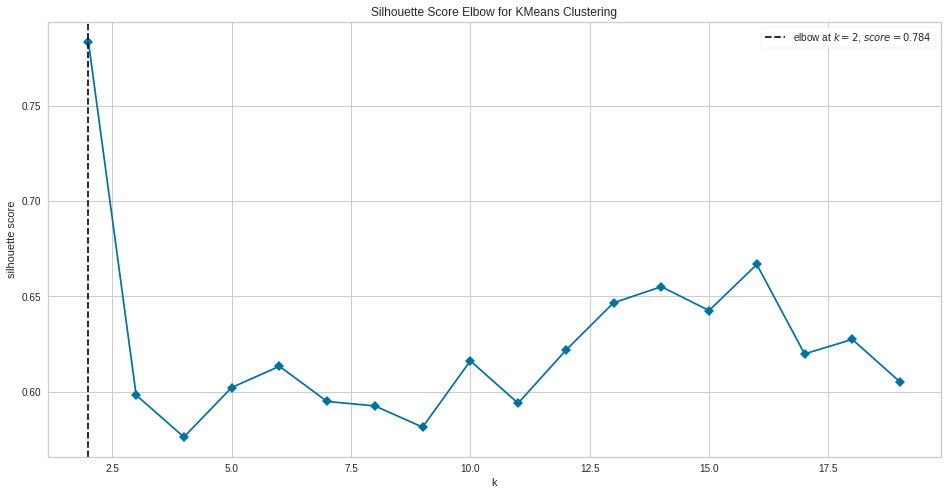

In [6]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(state_2019)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-Means
Create and fit optimal K-means cluster model

In [7]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(state_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is " +str(
        metrics.silhouette_score(state_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.6416985631988776
Silhouette score for k(clusters)= 4 is 0.5760960310280385
Silhouette score for k(clusters)= 5 is 0.6020824155969047
Silhouette score for k(clusters)= 6 is 0.6132758125134767
Silhouette score for k(clusters)= 7 is 0.6072084680337061
Silhouette score for k(clusters)= 8 is 0.5924396758053079
Silhouette score for k(clusters)= 9 is 0.5887592124132135
Silhouette score for k(clusters)= 10 is 0.5779076915950183
Silhouette score for k(clusters)= 11 is 0.6240560817973984
Silhouette score for k(clusters)= 12 is 0.6216691462847351
Silhouette score for k(clusters)= 13 is 0.601490100138627
Silhouette score for k(clusters)= 14 is 0.6264313336799006


In [8]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(state_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [9]:
# Sum of Square Errors
kmeans.inertia_

6574853928.123749

In [10]:
# no. of iterations required to converge
kmeans.n_iter_

4

In [11]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(state_2019)
Counter(labels)

Counter({0: 6, 1: 2, 2: 1, 3: 10, 4: 4, 5: 1, 6: 4, 7: 10, 8: 2, 9: 1, 10: 10})

In [12]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','states']).sort_values(by='cluster')
counter_df

,cluster,states
1,0,6
10,1,2
8,2,1
6,3,10
4,4,4
7,5,1
9,6,4
0,7,10
3,8,2
5,9,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'States')

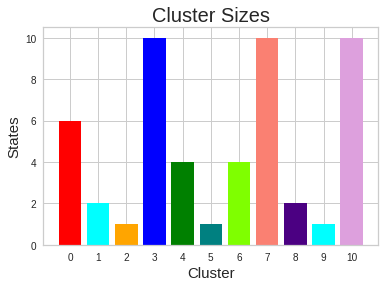

In [13]:
plt.bar('cluster', 'states', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("States", size=15)

In [14]:
state_2019['cluster'] = labels
kmeans.cluster_centers_

array([[1.55166667e+02, 2.33808400e+05],
       [9.81000000e+02, 6.99742399e+05],
       [2.26000000e+02, 1.54804712e+06],
       [2.19400000e+02, 3.52655131e+05],
       [4.18750000e+02, 4.71844843e+05],
       [1.12940000e+04, 9.70809750e+05],
       [9.90000000e+01, 1.60802727e+05],
       [1.85700000e+02, 2.89008188e+05],
       [5.05000000e+01, 4.09863016e+05],
       [5.50000000e+01, 5.27220742e+05],
       [9.04000000e+01, 1.93900269e+05]])

In [15]:
# Look at outlier
state_2019[state_2019.cluster==5][['density', 'average_listing_price']]

,density,average_listing_price
7,11294,970809.75


In [16]:
km = KMeans(n_clusters=11)
kmeans = km.fit(state_2019)

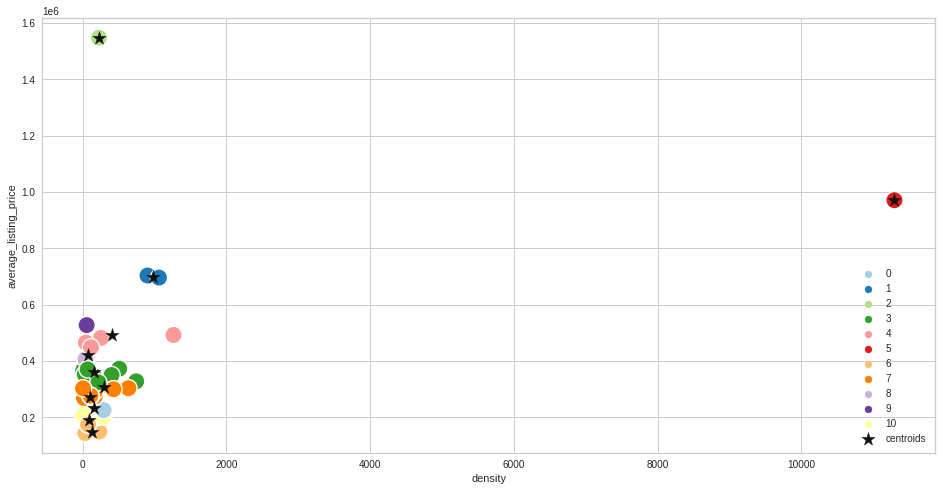

In [17]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='density', y='average_listing_price', hue='cluster', s= 300, 
                data=state_2019, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster

In [18]:
state_2019.head(5)

,density,average_listing_price,cluster
0,1,296151.708130,7
1,99,231299.367110,0
2,57,181383.965378,10
3,62,413499.723214,8
4,253,481696.180821,4


In [19]:
df_state_2019['cluster'] = state_2019['cluster']
df_state_2019[['state','density', 'average_listing_price','cluster']].head(3)

,state,density,average_listing_price,cluster
0,AK,1,296151.708130,7
1,AL,99,231299.367110,0
2,AR,57,181383.965378,10


In [20]:
df_state_2019[(state_2019['cluster']==5)]

,state,density,average_listing_price,cluster
7,DC,11294,970809.75,5


### Identifies the Cluster's Properties

In [21]:
for x in range(0,11):
  print("This is the State (Cleansed) 2019 cluster ", x, "\n", df_state_2019[(df_state_2019['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the State (Cleansed) 2019 cluster  0 
           density  average_listing_price
count    6.000000               6.000000
mean   155.166667          233808.399700
min     71.000000          225095.853955
max    290.000000          246354.551377 

This is the State (Cleansed) 2019 cluster  1 
        density  average_listing_price
count      2.0               2.000000
mean     981.0          699742.398611
min      901.0          695985.950000
max     1061.0          703498.847222 

This is the State (Cleansed) 2019 cluster  2 
        density  average_listing_price
count      1.0                  1.000
mean     226.0            1548047.125
min      226.0            1548047.125
max      226.0            1548047.125 

This is the State (Cleansed) 2019 cluster  3 
        density  average_listing_price
count     10.0              10.000000
mean     219.4          352655.131324
min        7.0          323783.785265
max      744.0          372431.277778 

This is the State (Cleansed) 

### 3.1b For the Year 2021

### Determine Optimal Cluster (Elbow Method)

In [22]:
df_state_2021 = df_2021_ALP.groupby(by = ['state', 'density'])['average_listing_price'].mean().reset_index()
state_2021 = df_state_2019[['density', 'average_listing_price']]
state_2021.head(3)

,density,average_listing_price
0,1,296151.708130
1,99,231299.367110
2,57,181383.965378


In [23]:
state_2021.shape

(51, 2)

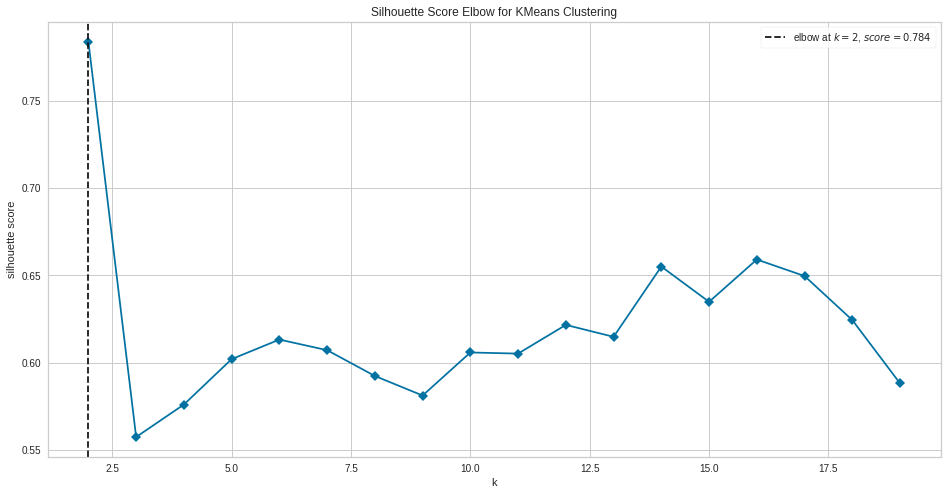

In [24]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(state_2021)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-Means
Create and fit optimal K-means cluster model

In [25]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(state_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is " +str(
        metrics.silhouette_score(state_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.6416985631988776
Silhouette score for k(clusters)= 4 is 0.5760960310280385
Silhouette score for k(clusters)= 5 is 0.6020824155969047
Silhouette score for k(clusters)= 6 is 0.6132758125134767
Silhouette score for k(clusters)= 7 is 0.6072084680337061
Silhouette score for k(clusters)= 8 is 0.5924396758053079
Silhouette score for k(clusters)= 9 is 0.5887592124132135
Silhouette score for k(clusters)= 10 is 0.5779076915950183
Silhouette score for k(clusters)= 11 is 0.6240560817973984
Silhouette score for k(clusters)= 12 is 0.6216691462847351
Silhouette score for k(clusters)= 13 is 0.601490100138627
Silhouette score for k(clusters)= 14 is 0.6264313336799006


In [26]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(state_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [27]:
# Sum of Square Errors
kmeans.inertia_

6788990311.754059

In [28]:
# no. of iterations required to converge
kmeans.n_iter_

3

In [29]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(state_2021)
Counter(labels)

Counter({0: 4, 1: 1, 2: 2, 3: 8, 4: 1, 5: 12, 6: 4, 7: 8, 8: 6, 9: 2, 10: 3})

In [30]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','states']).sort_values(by='cluster')
counter_df

,cluster,states
10,0,4
7,1,1
9,2,2
6,3,8
5,4,1
2,5,12
4,6,4
0,7,8
1,8,6
8,9,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'States')

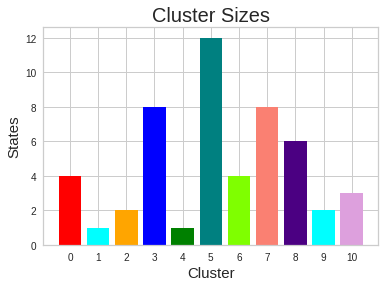

In [31]:
plt.bar('cluster', 'states', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("States", size=15)

In [32]:
state_2021['cluster'] = labels
kmeans.cluster_centers_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[1.01500000e+02, 2.73305512e+05],
       [2.26000000e+02, 1.54804712e+06],
       [9.81000000e+02, 6.99742399e+05],
       [1.54000000e+02, 3.59397171e+05],
       [1.12940000e+04, 9.70809750e+05],
       [8.62500000e+01, 1.90769458e+05],
       [4.03750000e+02, 4.91545560e+05],
       [3.01625000e+02, 3.06029222e+05],
       [1.55166667e+02, 2.33808400e+05],
       [1.32500000e+02, 1.46490055e+05],
       [7.20000000e+01, 4.22714635e+05]])

In [33]:
# Look at outlier
state_2021[state_2021.cluster==5][['density', 'average_listing_price']]

,density,average_listing_price
2,57,181383.965378
12,57,176579.628672
15,189,199845.609025
17,114,200891.279049
24,89,194100.651660
25,63,192912.607497
28,11,190384.417437
29,25,185801.133308
35,288,202138.118306
36,57,184192.527866


In [34]:
km = KMeans(n_clusters=11)
kmeans = km.fit(state_2021)

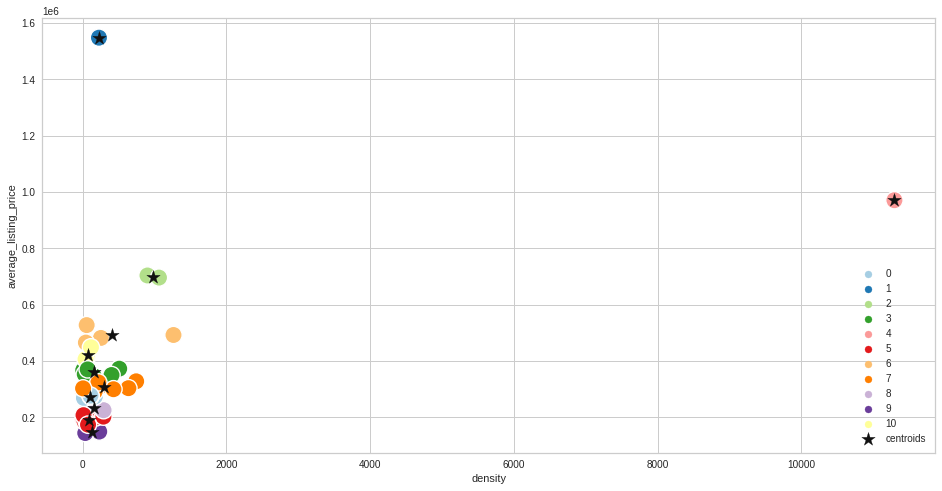

In [35]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='density', y='average_listing_price', hue='cluster', s= 300, 
                data=state_2021, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster

In [36]:
state_2021.head(5)

,density,average_listing_price,cluster
0,1,296151.708130,7
1,99,231299.367110,8
2,57,181383.965378,5
3,62,413499.723214,10
4,253,481696.180821,6


In [37]:
df_state_2021['cluster'] = state_2021['cluster']
df_state_2021[['state','density', 'average_listing_price','cluster']].head(3)

,state,density,average_listing_price,cluster
0,AK,1,388509.893863,7
1,AL,99,277922.153072,8
2,AR,57,220453.469822,5


In [38]:
df_state_2021[(state_2021['cluster']==5)]

,state,density,average_listing_price,cluster
2,AR,57,220453.469822,5
12,IA,57,191321.896207,5
15,IN,189,250402.014712,5
17,KY,114,257694.961790,5
24,MO,89,244039.123908,5
25,MS,63,234214.939129,5
28,ND,11,211834.541060,5
29,NE,25,222109.848121,5
35,OH,288,239499.895443,5
36,OK,57,236297.686970,5


In [39]:
df_state_2021[(state_2021['cluster']==5)]

,state,density,average_listing_price,cluster
2,AR,57,220453.469822,5
12,IA,57,191321.896207,5
15,IN,189,250402.014712,5
17,KY,114,257694.961790,5
24,MO,89,244039.123908,5
25,MS,63,234214.939129,5
28,ND,11,211834.541060,5
29,NE,25,222109.848121,5
35,OH,288,239499.895443,5
36,OK,57,236297.686970,5


### Identifies the Cluster's Properties

In [40]:
for x in range(0,11):
  print("This is the State (Cleansed) 2021 cluster ", x, "\n", df_state_2021[(df_state_2021['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the State (Cleansed) 2021 cluster  0 
        density  average_listing_price
count      4.0               4.000000
mean     101.5          325456.278955
min       17.0          298887.493925
max      170.0          338396.177347 

This is the State (Cleansed) 2021 cluster  1 
        density  average_listing_price
count      1.0                  1.000
mean     226.0            1776541.625
min      226.0            1776541.625
max      226.0            1776541.625 

This is the State (Cleansed) 2021 cluster  2 
        density  average_listing_price
count      2.0               2.000000
mean     981.0          901117.897475
min      901.0          865952.578283
max     1061.0          936283.216667 

This is the State (Cleansed) 2021 cluster  3 
        density  average_listing_price
count      8.0               8.000000
mean     154.0          489150.754589
min        7.0          373224.274343
max      508.0          569405.536028 

This is the State (Cleansed) 2021 cluster  4

# 4. Real Estate (Uncleansed with Outliers)


## 4.1a For the Year 2019

In [41]:
df2_2019_ALP = pd.read_csv('df_outliers_2019_ALP.csv', index_col=False)
df2_2019_ALP

,state,average_listing_price,density
0,AK,276819.326797,1
1,AK,255966.615385,1
2,AK,408342.358974,1
3,AK,326147.166667,1
4,AK,317021.666667,1
...,...,...,...
2144,WY,369577.833333,5
2145,WY,244374.625000,5
2146,WY,455158.666667,5
2147,WY,285269.750000,5


## 4.1b For the Year 2021

In [42]:
df2_2021_ALP = pd.read_csv('df_outliers_2021_ALP.csv', index_col=False)
df2_2021_ALP

,state,average_listing_price,density
0,AK,312031.960938,1
1,AK,384757.000000,1
2,AK,734775.722222,1
3,AK,426217.416667,1
4,AK,424255.666667,1
...,...,...,...
2144,WY,545347.416667,5
2145,WY,320769.125000,5
2146,WY,870162.416667,5
2147,WY,382534.333333,5


# 5. K-Means:


## 5.1 State

### 5.1a  For Year 2019

### Determine Optimal Cluster (Elbow Method)

In [43]:
df2_state_2019 = df2_2019_ALP.groupby(by = ['state', 'density'])['average_listing_price'].mean().reset_index()
state2_2019 = df2_state_2019[['density', 'average_listing_price']]
state2_2019.head(3)

,density,average_listing_price
0,1,323332.693895
1,99,251095.163580
2,57,198316.728871


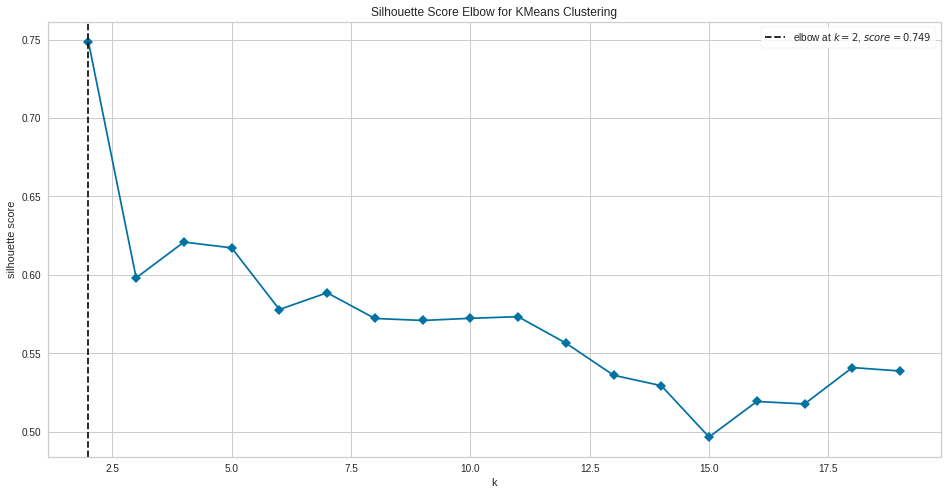

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(state2_2019)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-Means
Create and fit optimal K-means cluster model

In [45]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(state2_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is " +str(
        metrics.silhouette_score(state2_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.6007464776608867
Silhouette score for k(clusters)= 4 is 0.620936307496041
Silhouette score for k(clusters)= 5 is 0.6087437789259795
Silhouette score for k(clusters)= 6 is 0.5779070670588622
Silhouette score for k(clusters)= 7 is 0.5885922958757754
Silhouette score for k(clusters)= 8 is 0.5722085052240861
Silhouette score for k(clusters)= 9 is 0.5709207871512749
Silhouette score for k(clusters)= 10 is 0.5722996215782604
Silhouette score for k(clusters)= 11 is 0.573338947912194
Silhouette score for k(clusters)= 12 is 0.5679817463733438
Silhouette score for k(clusters)= 13 is 0.5388943839643451
Silhouette score for k(clusters)= 14 is 0.5141547459721278


In [46]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(state2_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [47]:
# Sum of Square Errors
kmeans.inertia_

13801689262.093182

In [48]:
# no. of iterations required to converge
kmeans.n_iter_

3

In [49]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(state2_2019)
Counter(labels)

Counter({0: 8, 1: 1, 2: 7, 3: 1, 4: 2, 5: 5, 6: 8, 7: 2, 8: 4, 9: 11, 10: 2})

In [50]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','states']).sort_values(by='cluster')
counter_df

,cluster,states
1,0,8
9,1,1
3,2,7
8,3,1
5,4,2
6,5,5
0,6,8
4,7,2
7,8,4
2,9,11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'States')

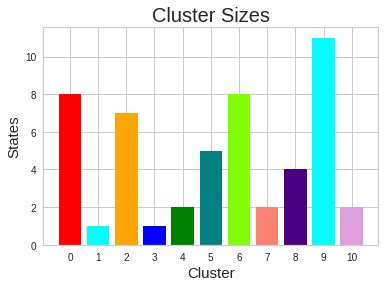

In [51]:
plt.bar('cluster', 'states', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("States", size=15)

In [52]:
state2_2019['cluster'] = labels
kmeans.cluster_centers_

array([[1.10125000e+02, 2.53170322e+05],
       [9.01000000e+02, 1.06621099e+06],
       [2.44142857e+02, 4.28217022e+05],
       [2.26000000e+02, 1.54804712e+06],
       [5.58000000e+02, 7.26147786e+05],
       [4.34200000e+02, 4.94369838e+05],
       [1.21750000e+02, 3.16669822e+05],
       [5.77350000e+03, 9.33427333e+05],
       [2.09750000e+02, 3.76029565e+05],
       [1.05818182e+02, 2.06065687e+05],
       [3.35000000e+01, 5.63376280e+05]])

In [53]:
# Look at outlier
state2_2019[state_2019.cluster==5][['density', 'average_listing_price']]

,density,average_listing_price
7,11294,970809.75


In [54]:
km = KMeans(n_clusters=11)
kmeans = km.fit(state_2019)

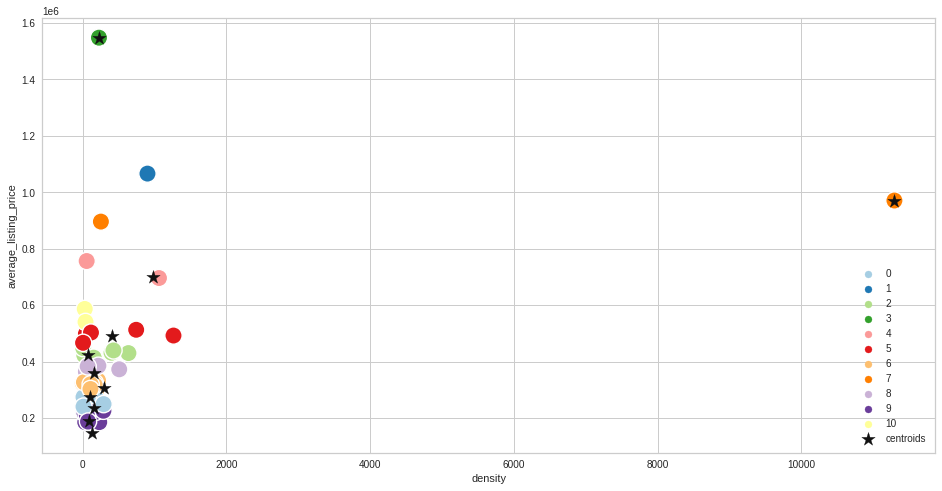

In [55]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='density', y='average_listing_price', hue='cluster', s= 300, 
                data=state2_2019, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster

In [56]:
state2_2019.head(5)

,density,average_listing_price,cluster
0,1,323332.693895,6
1,99,251095.163580,0
2,57,198316.728871,9
3,62,413499.723214,2
4,253,896044.915331,7


In [57]:
df2_state_2019['cluster'] = state2_2019['cluster']
df2_state_2019[['state','density', 'average_listing_price','cluster']].head(3)

,state,density,average_listing_price,cluster
0,AK,1,323332.693895,6
1,AL,99,251095.163580,0
2,AR,57,198316.728871,9


In [58]:
df2_state_2019[(state_2019['cluster']==3)]

,state,density,average_listing_price,cluster
6,CT,744,512557.937500,5
8,DE,508,372431.277778,8
9,FL,401,431180.136973,2
13,ID,22,422205.745192,2
21,ME,44,363930.283333,8
26,MT,7,447669.991645,2
30,NH,153,413658.722222,2
33,NV,28,586436.998485,10
45,VA,218,384979.562684,8
46,VT,69,382777.136905,8


### Identifies the Cluster's Properties

In [59]:
for x in range(0,11):
  print("This is the State (Uncleansed) 2019 cluster ", x, "\n", df2_state_2019[(df2_state_2019['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the State (Uncleansed) 2019 cluster  0 
        density  average_listing_price
count    8.000               8.000000
mean   110.125          253170.322079
min     11.000          229981.631344
max    290.000          273984.404347 

This is the State (Uncleansed) 2019 cluster  1 
        density  average_listing_price
count      1.0           1.000000e+00
mean     901.0           1.066211e+06
min      901.0           1.066211e+06
max      901.0           1.066211e+06 

This is the State (Uncleansed) 2019 cluster  2 
           density  average_listing_price
count    7.000000               7.000000
mean   244.142857          428217.021868
min      7.000000          413499.723214
max    636.000000          447669.991645 

This is the State (Uncleansed) 2019 cluster  3 
        density  average_listing_price
count      1.0                  1.000
mean     226.0            1548047.125
min      226.0            1548047.125
max      226.0            1548047.125 

This is the State (Un

### 5.1 b For the Year 2021


### Determine Optimal Cluster (Elbow Method)

In [60]:
df2_state_2021 = df2_2021_ALP.groupby(by = ['state', 'density'])['average_listing_price'].mean().reset_index()
state2_2021 = df2_state_2019[['density', 'average_listing_price']]
state2_2021.head(3)

,density,average_listing_price
0,1,323332.693895
1,99,251095.163580
2,57,198316.728871


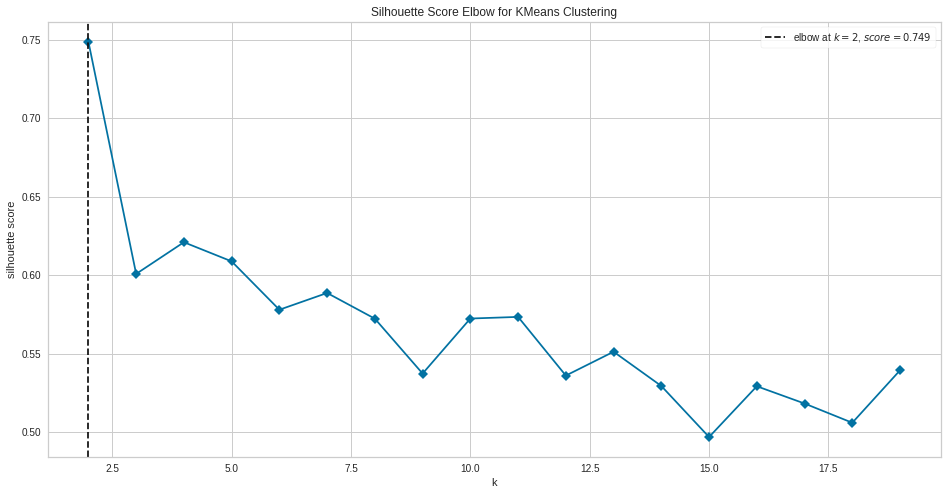

In [61]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(state2_2021)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-Means
Create and fit optimal K-means cluster model

In [62]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(state2_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is " +str(
        metrics.silhouette_score(state2_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.6007464776608867
Silhouette score for k(clusters)= 4 is 0.620936307496041
Silhouette score for k(clusters)= 5 is 0.6087437789259795
Silhouette score for k(clusters)= 6 is 0.5779070670588622
Silhouette score for k(clusters)= 7 is 0.5885922958757754
Silhouette score for k(clusters)= 8 is 0.5722085052240861
Silhouette score for k(clusters)= 9 is 0.5709207871512749
Silhouette score for k(clusters)= 10 is 0.5722996215782604
Silhouette score for k(clusters)= 11 is 0.573338947912194
Silhouette score for k(clusters)= 12 is 0.5679817463733438
Silhouette score for k(clusters)= 13 is 0.5388943839643451
Silhouette score for k(clusters)= 14 is 0.5141547459721278


In [63]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(state2_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [64]:
# Sum of Square Errors
kmeans.inertia_

13801689262.093182

In [65]:
# no. of iterations required to converge
kmeans.n_iter_

2

In [66]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(state2_2021)
Counter(labels)

Counter({0: 2, 1: 8, 2: 1, 3: 1, 4: 12, 5: 7, 6: 2, 7: 2, 8: 4, 9: 7, 10: 5})

In [67]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','states']).sort_values(by='cluster')
counter_df

,cluster,states
10,0,2
1,1,8
9,2,1
8,3,1
2,4,12
3,5,7
5,6,2
4,7,2
7,8,4
0,9,7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'States')

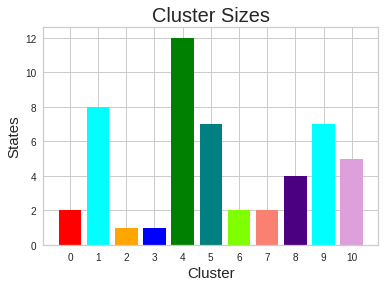

In [68]:
plt.bar('cluster', 'states', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("States", size=15)

In [69]:
state2_2021['cluster'] = labels
kmeans.cluster_centers_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[3.35000000e+01, 5.63376280e+05],
       [1.19125000e+02, 2.60464043e+05],
       [9.01000000e+02, 1.06621099e+06],
       [2.26000000e+02, 1.54804712e+06],
       [1.06500000e+02, 2.08058682e+05],
       [2.44142857e+02, 4.28217022e+05],
       [5.58000000e+02, 7.26147786e+05],
       [5.77350000e+03, 9.33427333e+05],
       [2.09750000e+02, 3.76029565e+05],
       [1.12571429e+02, 3.20718169e+05],
       [4.34200000e+02, 4.94369838e+05]])

In [70]:
# Look at outlier
state2_2021[state_2021.cluster==5][['density', 'average_listing_price']]

,density,average_listing_price
2,57,198316.728871
12,57,202609.763889
15,189,222233.178491
17,114,229981.631344
24,89,223117.585560
25,63,209818.220328
28,11,273984.404347
29,25,217954.668291
35,288,225535.226442
36,57,210063.064273


In [71]:
km = KMeans(n_clusters=11)
kmeans = km.fit(state_2021)

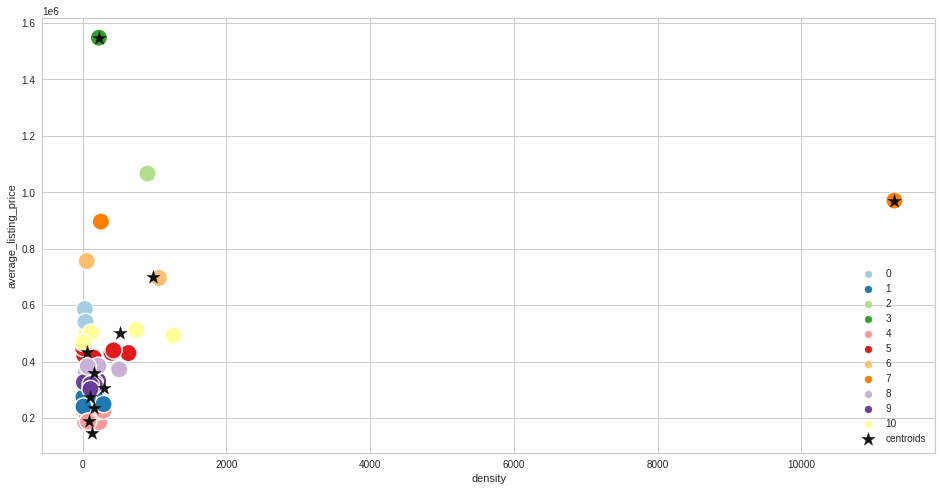

In [72]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='density', y='average_listing_price', hue='cluster', s= 300, 
                data=state2_2021, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster

In [73]:
state2_2021.head(5)

,density,average_listing_price,cluster
0,1,323332.693895,9
1,99,251095.163580,1
2,57,198316.728871,4
3,62,413499.723214,5
4,253,896044.915331,7


In [74]:
df2_state_2021['cluster'] = state2_2021['cluster']
df2_state_2021[['state','density', 'average_listing_price','cluster']].head(3)

,state,density,average_listing_price,cluster
0,AK,1,433692.085395,9
1,AL,99,311323.890947,1
2,AR,57,253480.810727,4


In [75]:
df2_state_2021[(state2_2021['cluster']==1)]

,state,density,average_listing_price,cluster
1,AL,99,311323.890947,1
10,GA,186,392316.906424,1
18,LA,107,287659.914530,1
22,MI,178,354291.689259,1
23,MN,71,307566.893369,1
28,ND,11,252933.372056,1
38,PA,290,307486.623016,1
41,SD,11,322138.787776,1


### Identifies the Cluster's Properties

In [76]:
for x in range(0,11):
  print("This is the State 2021 (Uncleansed) cluster ", x, "\n", df2_state_2021[(df2_state_2021['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the State 2021 (Uncleansed) cluster  0 
        density  average_listing_price
count      2.0               2.000000
mean      33.5          826075.257928
min       28.0          778058.127824
max       39.0          874092.388033 

This is the State 2021 (Uncleansed) cluster  1 
        density  average_listing_price
count    8.000               8.000000
mean   119.125          316964.759672
min     11.000          252933.372056
max    290.000          392316.906424 

This is the State 2021 (Uncleansed) cluster  2 
        density  average_listing_price
count      1.0           1.000000e+00
mean     901.0           1.361563e+06
min      901.0           1.361563e+06
max      901.0           1.361563e+06 

This is the State 2021 (Uncleansed) cluster  3 
        density  average_listing_price
count      1.0                  1.000
mean     226.0            1776541.625
min      226.0            1776541.625
max      226.0            1776541.625 

This is the State 2021 (Uncleansed) 

# 6. Save to CSV
K-Means with cluster:
- State (Cleansed) - df_state_2019.csv and df_state_2021.csv
- State (Uncleansed) - df_outliers_state_2019.csv and df_outliers_state_2021.csv


In [77]:
df_state_2019.to_csv('df_state_2019.csv', index=False)
df_state_2021.to_csv('df_state_2021.csv', index=False)
df2_state_2019.to_csv('df_outliers_state_2019.csv', index=False)
df2_state_2021.to_csv('df_outliers_state_2021.csv', index=False)